# A. General Information:
- **Name:** Eduardo Galindez.
- **Date:** October 19, 2022.
- **Model:** A/B Testing.

# B. Code Development

## 1.- Libraries & Functions

In [1]:
# Libraries.
import numpy as np
import pandas as pd
import tmdbsimple as tmdb 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from tqdm.notebook import tqdm_notebook
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## 2.- Data
- The data to work with is from [Part A](https://github.com/edleafvirtual/Project-4-How_to_Market_New_Cards/blob/main/Part_A_KMeans.ipynb).

In [2]:
# Load title basics table.
main_df = pd.read_csv('./Data/DataFrame_Customers_with_Cluster.csv')
main_df.head(5)

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,1.197,0.0,6.3,A
1,47,1,26,100,12.800,0.0,12.8,B
2,33,2,10,57,11.913,1.0,20.9,C
3,29,2,4,19,1.197,0.0,6.3,A
4,47,1,31,253,18.216,0.0,7.2,B


In [3]:
# Check general info.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Education        850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Debt             850 non-null    float64
 5   Defaulted        850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
 7   Cluster          850 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 53.2+ KB


**Notes:**
- 'Age', 'Education', 'Years Employed' & 'Clusters' are columns that must be object instead of numerics.
- 'Defaulted' column will be transformed to integer to then changed to object dtype.

In [4]:
# Let's convert 'Defaulted' to integer.
main_df['Defaulted'] = main_df['Defaulted'].apply(np.int64)

In [5]:
# Let's convert the columns mentioned to object.
main_df['Age'] = main_df['Age'].astype(object)
main_df['Education'] = main_df['Education'].astype(object)
main_df['Years Employed'] = main_df['Years Employed'].astype(object)
main_df['Cluster'] = main_df['Cluster'].astype(object)
main_df['Defaulted'] = main_df['Defaulted'].astype(object)


In [6]:
# Confirm transformation.
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    object 
 1   Education        850 non-null    object 
 2   Years Employed   850 non-null    object 
 3   Income           850 non-null    int64  
 4   Debt             850 non-null    float64
 5   Defaulted        850 non-null    object 
 6   DebtIncomeRatio  850 non-null    float64
 7   Cluster          850 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 53.2+ KB


## 3.- Hypothesis Test

**Notes:**
- The objective is to evaluate how each cluster would react to the advertising from Platinum & Gold Credit Cards.
- Our idea is to deliver marketing strategic suggestions based on two of the variables evaluated in Part A: Income & Debt. This way the campaign would have keywords related to the best result found it.
- Both variables (Income & Debt) are numeric and we have 3 clusters (A, B & C) meaning that we are going to use [ANOVA](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php) to evaluate the hypothesis.

### 3.1. Is the income performance a variable to be pointed in the advertising/marketing content?
- The hypothesis for this statement are:
    - **H0** (Null): Marketing strategies focused on how credit cards would improve income performance won't have a significant effect on customer conversions.
    - **H1** (Alternate): Customer conversion rate would be increased by focusing on marketing strategies that indicate the income performance would be improved using the credit cards.
    

Cluster
A    34.83
B    99.30
C    32.63
Name: Income, dtype: float64


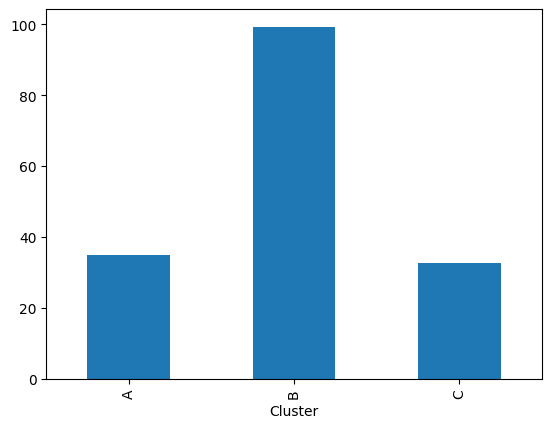

In [7]:
# Let's have a brief look of income per cluster.
main_df.groupby('Cluster')['Income'].mean().plot(kind='bar');
print(main_df.groupby('Cluster')['Income'].mean().round(2))

**Test for Significant Outliers**

In [8]:
# Separate the groups.
groups = {}
for i in main_df['Cluster'].unique():
    data = main_df.loc[main_df['Cluster']==i,'Income'].copy()
    groups[i] = data 
groups.keys()

dict_keys(['A', 'B', 'C'])

In [9]:
# Set up the columns needed.
needed_columns = ['Cluster', 'Income']

In [10]:
# Let's call back the keys in region.
groups.keys()

dict_keys(['A', 'B', 'C'])

In [11]:
# Look for outliers to remove them.
for Cluster, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'We found', outliers.sum(), 'Outliers in cluster', Cluster)
    # Remove outliers.
    data = data.loc[~outliers]
    groups[Cluster] = data

We found 6 Outliers in cluster A
We found 2 Outliers in cluster B
We found 3 Outliers in cluster C


**Test for Normality**

In [12]:
# Running normal test on each region.
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p':p, 'test stat':stat,}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
A,511.0,1.884578e-17,77.020486
B,160.0,1.526078e-12,54.416640
C,168.0,1.130855e-06,27.385073


In [13]:
# Checking sig with pandas.
norm_results_df['sig_dif?'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig_dif?
A,511.0,1.884578e-17,77.020486,True
B,160.0,1.526078e-12,54.416640,True
C,168.0,1.130855e-06,27.385073,True


**Notes:**
- Having a result as True on 'sig_dif?' column means that the distribution tested, is significantly different than a normal distribution.
- The test indicates that we must reject H0 and accept H1.

**Test for Equal Variance**

In [14]:
# Calculating with the * operator.
levene_results = stats.levene(*groups.values())
print(f'Results are:', levene_results)
if levene_results.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: LeveneResult(statistic=97.3032504966865, pvalue=1.0218828698925714e-38)
In conlusion:
- We reject H0.


In [15]:
# Now, let's try with One-Way ANOVA.
anova_result = stats.f_oneway(*groups.values())
print(f'Results are:', anova_result)
if anova_result.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: F_onewayResult(statistic=417.49664647663184, pvalue=1.900187949899092e-126)
In conlusion:
- We reject H0.


In [16]:
# Now, let's try another alternative method with Kruskal Test.
kruskal_result = stats.kruskal(*groups.values())
print(f'Results are:', kruskal_result)
if kruskal_result.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: KruskalResult(statistic=328.81596368857754, pvalue=3.967534429575124e-72)
In conlusion:
- We reject H0.


In [17]:
# Perform Tukey's multiple comparison test and display the summary.
values = main_df['Income']
labels = main_df['Cluster']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,64.4626,0.0,58.3576,70.5677,True
A,C,-2.2079,0.6615,-8.1894,3.7736,False
B,C,-66.6706,0.0,-74.1046,-59.2365,True


**Notes:**
- We developed methods to prove that we were right about question 3.1, and used three different tests (Normality, Equal Variance & Independent T-Test) that recommended to reject H0.
- We decided to perform Tukey's Test to find which clusters are more susceptible to buy the idea.
    - Cluster B, who has the highest income as it was showed at the beginning of Section 3.1, rejects H0 when is compared with Cluster A and Cluster C. The reason is because clusters A & C, in average, have ~60% less income compared to Cluster C.
    - Clusters A & C are looking for better income, so if the credit card campaign promise they can do more improving their income performance, the customer conversion rate would be significantly higher than not mentioning it.

### 3.2. Is the debt the main variable to be pointed in the advertising/marketing content?
- The hypothesis for this statement are:
    - **H0** (Null): Marketing strategies focused on how credit cards would improve debt performance won't have a significant effect on customer conversions.
    - **H1** (Alternate): Customer conversion rate would be increased by focusing on marketing strategies that indicate the debt performance would be improved using the credit cards.

Cluster
A     2.68
B    10.84
C     4.76
Name: Debt, dtype: float64


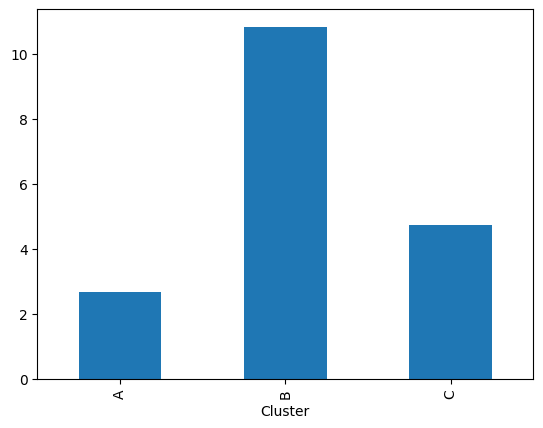

In [18]:
# Let's have a brief look of income per cluster.
main_df.groupby('Cluster')['Debt'].mean().plot(kind='bar');
print(main_df.groupby('Cluster')['Debt'].mean().round(2))

**Test for Significant Outliers**

In [19]:
# Separate the groups.
groups = {}
for i in main_df['Cluster'].unique():
    data = main_df.loc[main_df['Cluster']==i,'Debt'].copy()
    groups[i] = data 
groups.keys()

dict_keys(['A', 'B', 'C'])

In [20]:
# Set up the columns needed.
needed_columns = ['Cluster', 'Debt']

In [21]:
# Let's call back the keys in region.
groups.keys()

dict_keys(['A', 'B', 'C'])

In [22]:
# Look for outliers to remove them.
for Cluster, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    print(f'We found', outliers.sum(), 'Outliers in cluster', Cluster)
    # Remove outliers.
    data = data.loc[~outliers]
    groups[Cluster] = data

We found 4 Outliers in cluster A
We found 3 Outliers in cluster B
We found 4 Outliers in cluster C


**Test for Normality**

In [23]:
# Running normal test on each region.
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p':p, 'test stat':stat,}

norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
A,513.0,9.726876e-15,64.527767
B,159.0,5.629849e-09,37.990367
C,167.0,3.633991e-07,29.655528


In [24]:
# Checking sig with pandas.
norm_results_df['sig_dif?'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig_dif?
A,513.0,9.726876e-15,64.527767,True
B,159.0,5.629849e-09,37.990367,True
C,167.0,3.633991e-07,29.655528,True


**Notes:**
- Having a result as True on 'sig_dif?' column means that the distribution tested, is significantly different than a normal distribution.
- The test indicates that we must reject H0 and accept H1.

**Test for Equal Variance**

In [25]:
# Calculating with the * operator.
levene_results = stats.levene(*groups.values())
print(f'Results are:', levene_results)
if levene_results.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: LeveneResult(statistic=128.90380146754808, pvalue=1.602920476088331e-49)
In conlusion:
- We reject H0.


In [26]:
# Now, let's try with One-Way ANOVA.
anova_result = stats.f_oneway(*groups.values())
print(f'Results are:', anova_result)
if anova_result.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: F_onewayResult(statistic=312.6876621288454, pvalue=4.090761481645252e-102)
In conlusion:
- We reject H0.


In [27]:
# Now, let's try another alternative method with Kruskal Test.
kruskal_result = stats.kruskal(*groups.values())
print(f'Results are:', kruskal_result)
if kruskal_result.pvalue <.05:
    print('\033[1mIn conlusion:\033[0;0m\n- We reject H0.')
else:
    print('\033[1mIn conlusion:\033[0;0m\n- We fail to reject H0. Clusters have equal variance.')

Results are: KruskalResult(statistic=285.050948856678, pvalue=1.2646575034906382e-62)
In conlusion:
- We reject H0.


In [28]:
# Perform Tukey's multiple comparison test and display the summary.
values = main_df['Debt']
labels = main_df['Cluster']

tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.1582,0.0,7.3191,8.9973,True
A,C,2.0714,0.0,1.2493,2.8936,True
B,C,-6.0868,0.0,-7.1086,-5.065,True


**Notes:**
- We developed methods to prove that we were right about question 3.2, and used three different tests (Normality, Equal Variance & Independent T-Test) that recommended to reject H0.
- One more time, we decided to perform Tukey's Test to find which clusters are more susceptible to buy the idea.
    - In this case, there is not different between groups. All of them would accept the idea about a credit card would improve their debt performance.

# C. Conclusions

- According to [Part A](https://github.com/edleafvirtual/Project-4-How_to_Market_New_Cards/blob/main/Part_A_KMeans.ipynb), Cluster A is the ideal customer for Platinum Credit Card, and Cluster C for Gold Credit Card. Therefore, in order to keep marketing costs low for both products, the campaign should indicates that the credit cards would help them to improve their income performance.
- Even when a credit card is meant to be a financial instrument to help the customers to spend more money in a healthy way, the code developed in Section 3.2 demonstrated that this campaign can be useful for Cluster C (Gold Credit Card), which debt is almost 1.8 times higher than Cluster A.